In [3]:
%cd /Users/genevieveberent/Desktop/Zak_Portfolio/PGA_Masters

/Users/genevieveberent/Desktop/Zak_Portfolio/PGA_Masters


In [4]:
## To analyze
import pandas as pd
import numpy as np

## To visualize
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

In [5]:
from plotly.tools import FigureFactory as FF

In [6]:
## Import Masters results and stats from 2015-2019

masters = pd.read_csv('Masters.csv')

In [7]:
masters.head()

,Unnamed: 0,Position,Score,FIR,FIR Rank,dist,dist Rank,GIR,GIR Rank,Putting,Putting Rank,Year,Cut
0,A. Scott,14,1,58.93,82,298.38,6,66.67,11,1.69,60,2014,0
1,B. Crenshaw,97,24,67.86,44,238.50,97,25.00,97,1.67,44,2014,1
2,B. Grace,80,9,53.57,93,280.75,73,44.44,89,1.61,22,2014,1
3,B. Haas,20,2,67.86,44,286.62,50,65.28,14,1.68,54,2014,0
4,B. Horschel,37,7,66.07,57,290.12,33,72.22,2,1.82,88,2014,0


In [8]:
masters.rename(columns={'Unnamed: 0': 'Player'}, inplace=True)

In [9]:
masters.index = masters['Player']

In [10]:
masters.drop('Player', axis=1, inplace=True)

In [11]:
masters.head()

,Position,Score,FIR,FIR Rank,dist,dist Rank,GIR,GIR Rank,Putting,Putting Rank,Year,Cut
Player,,,,,,,,,,,,
A. Scott,14,1,58.93,82,298.38,6,66.67,11,1.69,60,2014,0
B. Crenshaw,97,24,67.86,44,238.50,97,25.00,97,1.67,44,2014,1
B. Grace,80,9,53.57,93,280.75,73,44.44,89,1.61,22,2014,1
B. Haas,20,2,67.86,44,286.62,50,65.28,14,1.68,54,2014,0
B. Horschel,37,7,66.07,57,290.12,33,72.22,2,1.82,88,2014,0


In [12]:
masters.shape

(550, 12)

In [13]:
masters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, A. Scott to Zach Johnson
Data columns (total 12 columns):
Position        550 non-null int64
Score           550 non-null int64
FIR             550 non-null float64
FIR Rank        550 non-null int64
dist            550 non-null float64
dist Rank       550 non-null int64
GIR             550 non-null float64
GIR Rank        550 non-null int64
Putting         550 non-null float64
Putting Rank    550 non-null int64
Year            550 non-null int64
Cut             550 non-null int64
dtypes: float64(4), int64(8)
memory usage: 55.9+ KB


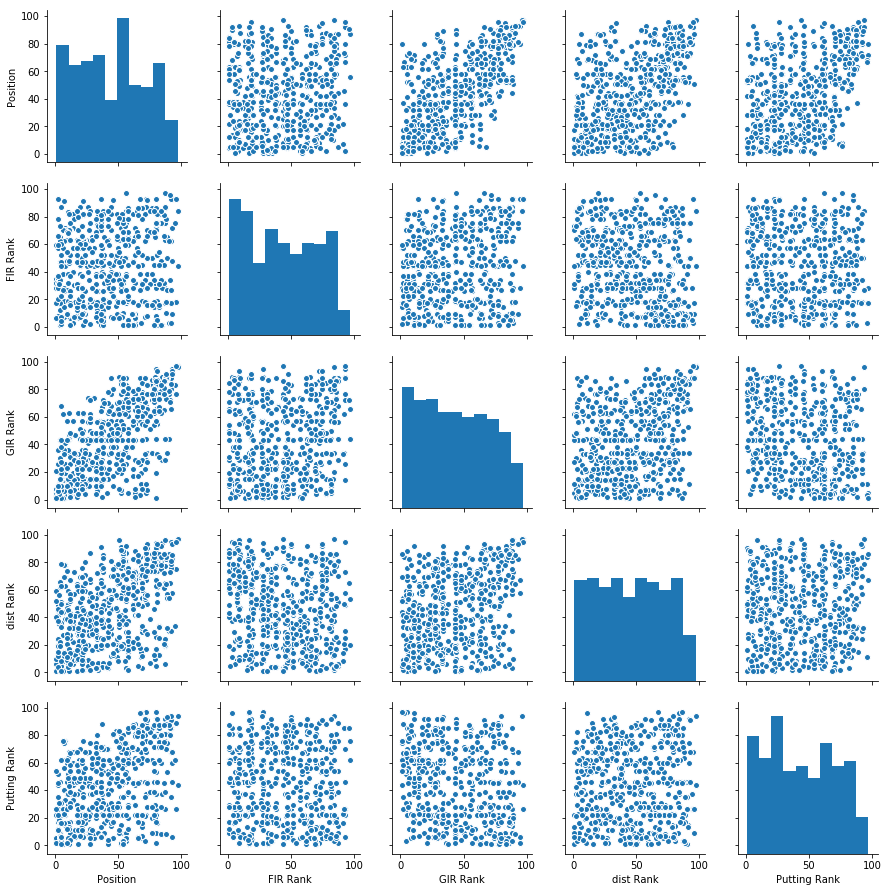

In [14]:
## Create a correlation matrix to see which stats correlate the most with the final position

ranks = masters[['Position', 'FIR Rank', 'GIR Rank', 'dist Rank', 'Putting Rank']]

ranks_pairplot = sns.pairplot(ranks)
plt.show()

In [15]:
ranks_pairplot.savefig('Ranks_Pairplot.png')

In [16]:
ranks.corr()

,Position,FIR Rank,GIR Rank,dist Rank,Putting Rank
Position,1.000000,0.092811,0.659563,0.444272,0.419760
FIR Rank,0.092811,1.000000,0.171187,-0.192826,-0.034371
GIR Rank,0.659563,0.171187,1.000000,0.360382,-0.215855
dist Rank,0.444272,-0.192826,0.360382,1.000000,0.023878
Putting Rank,0.419760,-0.034371,-0.215855,0.023878,1.000000


In [17]:
## Lets take a look at just the winners and where they finished in each of the categories over the years.

winners = masters[masters['Position'] == 1]

In [18]:
winners

,Position,Score,FIR,FIR Rank,dist,dist Rank,GIR,GIR Rank,Putting,Putting Rank,Year,Cut
Player,,,,,,,,,,,,
B. Watson,1,-8,71.43,28,305.62,1,69.44,5,1.61,22,2014,0
J. Spieth,1,-18,69.64,35,282.62,59,75.00,4,1.50,3,2015,0
D. Willett,1,-5,67.86,32,278.12,40,66.67,8,1.58,5,2016,0
Sergio Garcia,1,-9,80.36,6,291.50,6,75.00,2,1.65,26,2017,0
Patrick Reed,1,-15,73.21,17,298.50,10,66.67,21,1.44,2,2018,0
Tiger Woods,1,-13,62.50,59,294.00,52,80.56,1,1.67,54,2019,0


In [19]:
print('Average finish in Fairways in Regulation: {}'.format(winners['FIR Rank'].mean()))
print('Average finish in Driving Distance: {}'.format(winners['dist Rank'].mean()))
print('Average finish in Greens in Regulation: {}'.format(winners['GIR Rank'].mean()))
print('Average finish in Putting: {}'.format(winners['Putting Rank'].mean()))

Average finish in Fairways in Regulation: 29.5
Average finish in Driving Distance: 28.0
Average finish in Greens in Regulation: 6.833333333333333
Average finish in Putting: 18.666666666666668


In [64]:
winner_rankings = [['', 'Winners Average Finish'],
                  ['Fairways In Regulation', winners['FIR Rank'].mean()],
                  ['Driving Distance', winners['dist Rank'].mean()],
                  ['Greens In Regulation', round(winners['GIR Rank'].mean(), 2)],
                  ['Putting', round(winners['Putting Rank'].mean(), 2)]]

ranking_table = FF.create_table(winner_rankings, index=True)

ranking_table['data'][0]['colorscale'] = [[0, '#076652'], [0.5, '#ffffff'], [1, '#ffffff']]

for i in range(10):
    ranking_table['layout']['annotations'][i]['font'].update({'size':20})

pyo.iplot(ranking_table)

/Users/genevieveberent/Desktop/anaconda3/lib/python3.6/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [85]:
py.plot(ranking_table, filename='Average Finish for Winners')

'https://plot.ly/~zkrumlinde/36'

## Greens in Regulation Analysis

Greens in Regulation ranking had the highest correlation to the final place each player finished in the tournament at 0.659.  It was by far the stat that the winners collectively finished the best in, with the average winner ranking between 6th and 7th in Greens hit in regulation, and that includes a  21st ranking from Patrick Reed (it bumps down to 4th excluding Reed's finish).  Lets look more at the Greens in Regulation stat.

In [21]:
## Dataframe of just the Greens in Regulation info

gir = masters[['Position', 'Score', 'GIR', 'GIR Rank', 'Year', 'Cut']]

In [22]:
gir['Player'] = gir.index

In [23]:
gir.head()

,Position,Score,GIR,GIR Rank,Year,Cut,Player
Player,,,,,,,
A. Scott,14,1,66.67,11,2014,0,A. Scott
B. Crenshaw,97,24,25.00,97,2014,1,B. Crenshaw
B. Grace,80,9,44.44,89,2014,1,B. Grace
B. Haas,20,2,65.28,14,2014,0,B. Haas
B. Horschel,37,7,72.22,2,2014,0,B. Horschel


In [24]:
def text_info(x):
    if x[5] > 0:
        cut = 'Missed Cut'
    else: 
        cut = 'Made Cut'
        
    if x[1] > 0:
        score = '+' + str(x[1])
    else:
        score = str(x[1])
        
    return '<b> Player: ' + str(x[6]) + '</b> <br> GIR%: '+ str(x[2]) +  '<br> Score: ' + str(score) + '<br> Year: ' + str(x[4]) + '<br> Cut: ' + str(cut)
   

In [25]:
gir['text'] = gir.apply(text_info, axis=1)

In [26]:
gir.head()

,Position,Score,GIR,GIR Rank,Year,Cut,Player,text
Player,,,,,,,,
A. Scott,14,1,66.67,11,2014,0,A. Scott,<b> Player: A. Scott</b> <br> GIR%: 66.67<br> ...
B. Crenshaw,97,24,25.00,97,2014,1,B. Crenshaw,<b> Player: B. Crenshaw</b> <br> GIR%: 25.0<br...
B. Grace,80,9,44.44,89,2014,1,B. Grace,<b> Player: B. Grace</b> <br> GIR%: 44.44<br> ...
B. Haas,20,2,65.28,14,2014,0,B. Haas,<b> Player: B. Haas</b> <br> GIR%: 65.28<br> S...
B. Horschel,37,7,72.22,2,2014,0,B. Horschel,<b> Player: B. Horschel</b> <br> GIR%: 72.22<b...


In [27]:
gir_trace = {'type': 'scatter',
            'x': gir['GIR Rank'],
            'y': gir['Position'],
            'mode': 'markers',
            'text': gir['text'],
            'hoverinfo': ['text', 'x'],
            'marker': {'color': '#076652'}}

layout = {'title': 'Place based on Greens in Regulation Ranking',
         'xaxis': {'title': 'Greens in Regulation Ranking'},
         'yaxis': {'title': 'Place at the Masters'},
         'hovermode': 'closest'}

gir_plot = {'data': [gir_trace], 'layout': layout}

pyo.iplot(gir_plot)

## Look at Putting and Greens in Regulation relationship

In [28]:
gir_putt = masters[['Position', 'Score', 'GIR', 'GIR Rank', 'Putting', 'Putting Rank', 'Year', 'Cut']]

In [29]:
gir_putt['Player'] = gir_putt.index

In [30]:
gir_putt.head()

,Position,Score,GIR,GIR Rank,Putting,Putting Rank,Year,Cut,Player
Player,,,,,,,,,
A. Scott,14,1,66.67,11,1.69,60,2014,0,A. Scott
B. Crenshaw,97,24,25.00,97,1.67,44,2014,1,B. Crenshaw
B. Grace,80,9,44.44,89,1.61,22,2014,1,B. Grace
B. Haas,20,2,65.28,14,1.68,54,2014,0,B. Haas
B. Horschel,37,7,72.22,2,1.82,88,2014,0,B. Horschel


In [31]:
def text(x):
    if x['Cut'] == 0:
        cut = 'Made Cut'
    else: 
        cut = 'Missed Cut'
        
    if x['Score'] > 0:
        score = '+' + str(x['Score'])
    else:
        score = x['Score']
        
    text_col = '<b> Player: ' + str(x['Player']) + '</b> <br> Score: ' + str(score) + '<br> Year: ' + str(x['Year']) + '<br> Cut: ' + str(cut)
    
    return text_col

In [32]:
gir_putt['text'] = gir_putt.apply(text, axis=1)

In [33]:
gir_putt['gir+putt Ranking'] = gir_putt['Putting Rank'] + gir_putt['GIR Rank']

In [34]:
gir_putt['Yearly Ranking'] = gir_putt.groupby('Year')['gir+putt Ranking'].rank(method='min')

In [35]:
gir_putt.corr()['Position']

Position            1.000000
Score               0.820977
GIR                -0.648246
GIR Rank            0.659563
Putting             0.429885
Putting Rank        0.419760
Year               -0.063231
Cut                 0.827007
gir+putt Ranking    0.861546
Yearly Ranking      0.867770
Name: Position, dtype: float64

In [36]:
gir_putt.head()

,Position,Score,GIR,GIR Rank,Putting,Putting Rank,Year,Cut,Player,text,gir+putt Ranking,Yearly Ranking
Player,,,,,,,,,,,,
A. Scott,14,1,66.67,11,1.69,60,2014,0,A. Scott,<b> Player: A. Scott</b> <br> Score: +1<br> Ye...,71,24.0
B. Crenshaw,97,24,25.00,97,1.67,44,2014,1,B. Crenshaw,<b> Player: B. Crenshaw</b> <br> Score: +24<br...,141,91.0
B. Grace,80,9,44.44,89,1.61,22,2014,1,B. Grace,<b> Player: B. Grace</b> <br> Score: +9<br> Ye...,111,73.0
B. Haas,20,2,65.28,14,1.68,54,2014,0,B. Haas,<b> Player: B. Haas</b> <br> Score: +2<br> Yea...,68,21.0
B. Horschel,37,7,72.22,2,1.82,88,2014,0,B. Horschel,<b> Player: B. Horschel</b> <br> Score: +7<br>...,90,44.0


In [37]:
putt_gir_trace = {'type': 'scatter',
                 'x': gir_putt['gir+putt Ranking'],
                 'y': gir_putt['Position'],
                 'mode': 'markers',
                 'marker': {'color': '#076652'},
                 'text': gir_putt['text'],
                 'hoverinfo': ['text']}

layout = {'title': 'Green and Putting Relationship to Position',
         'xaxis': {'title': 'Combined GIR and Putting Ranking'},
         'yaxis': {'title': 'Final Place'},
         'hovermode': 'closest'}

putt_gir = {'data': [putt_gir_trace], 'layout': layout}
pyo.iplot(putt_gir)

In [84]:
putt_gir_yearlyRanking = {'type': 'scatter',
                 'x': gir_putt['Yearly Ranking'],
                 'y': gir_putt['Position'],
                 'mode': 'markers',
                 'marker': {'color': '#076652',
                           'opacity': .60},
                 'text': gir_putt['text'],
                 'hoverinfo': ['text']}

layout = {'title': 'Green and Putting Relationship to Position',
         'xaxis': {'title': 'Combined GIR and Putting Ranking by Year'},
         'yaxis': {'title': 'Final Place'},
         'hovermode': 'closest'}

putt_gir = {'data': [putt_gir_yearlyRanking], 'layout': layout}
pyo.iplot(putt_gir)

In [82]:
py.plot(putt_gir, filename='GIR + Putting Rank vs Position')

'https://plot.ly/~zkrumlinde/38'

In [39]:
putt_gir_trace = {'type': 'scatter',
                 'x': gir_putt['gir+putt Ranking'],
                 'y': gir_putt['Score'],
                 'mode': 'markers',
                 'marker': {'color': '#076652'},
                 'text': gir_putt['text'],
                 'hoverinfo': ['text']}

layout = {'title': 'Green and Putting Relationship to Score',
         'xaxis': {'title': 'Combined GIR and Putting Ranking'},
         'yaxis': {'title': 'Final Score'},
         'hovermode': 'closest'}

putt_gir = {'data': [putt_gir_trace], 'layout': layout}
pyo.iplot(putt_gir)

In [40]:
## Combine all the rankings to analyze their correlations

for i in ['FIR', 'GIR', 'dist', 'Putting']:
    for j in ['FIR', 'GIR', 'dist', 'Putting']:
            masters[str(i) + '_' + str(j) + '_Rank'] = masters[str(i) + ' Rank'] + masters[j + ' Rank']

In [66]:
## Just out of curiosity, does adding in the FIR and dist ranking to the GIR+Putting improve the correlation?

masters['GIR_Putting_FIR_Rank'] = masters['GIR Rank'] + masters['Putting Rank'] + masters['FIR Rank']
masters['GIR_Putting_dist_Rank'] = masters['GIR Rank'] + masters['Putting Rank'] + masters['dist Rank']
masters['All Rank'] = masters['GIR Rank'] + masters['Putting Rank'] + masters['FIR Rank'] + masters['dist Rank']



In [79]:
corr_df = pd.DataFrame(masters[['Position', 'Score', 'FIR Rank', 'dist Rank', 'GIR Rank', 'Putting Rank', 
         'FIR_GIR_Rank', 'FIR_dist_Rank', 'FIR_Putting_Rank', 'GIR_dist_Rank', 
         'GIR_Putting_Rank', 'dist_Putting_Rank', 'GIR_Putting_FIR_Rank', 
         'GIR_Putting_dist_Rank', 'All Rank']].corr().sort_values('Position', 
                                                                  ascending=False)['Position'])

corr_df

,Position
Position,1.000000
GIR_Putting_Rank,0.861546
GIR_Putting_dist_Rank,0.833996
Score,0.820977
All Rank,0.786357
GIR_Putting_FIR_Rank,0.695104
GIR_dist_Rank,0.669098
GIR Rank,0.659563
dist_Putting_Rank,0.603782
FIR_GIR_Rank,0.491253


Combining the GIR and Putting Rank together, is actually more correlated with the final place a player comes in than their final score in the tournament.  

In [68]:
masters.head()

,Position,Score,FIR,FIR Rank,dist,dist Rank,GIR,GIR Rank,Putting,Putting Rank,...,dist_GIR_Rank,dist_dist_Rank,dist_Putting_Rank,Putting_FIR_Rank,Putting_GIR_Rank,Putting_dist_Rank,Putting_Putting_Rank,GIR_Putting_FIR_Rank,GIR_Putting_dist_Rank,All Rank
Player,,,,,,,,,,,,,,,,,,,,,
A. Scott,14,1,58.93,82,298.38,6,66.67,11,1.69,60,...,17,12,66,142,71,66,120,153,77,159
B. Crenshaw,97,24,67.86,44,238.50,97,25.00,97,1.67,44,...,194,194,141,88,141,141,88,185,238,282
B. Grace,80,9,53.57,93,280.75,73,44.44,89,1.61,22,...,162,146,95,115,111,95,44,204,184,277
B. Haas,20,2,67.86,44,286.62,50,65.28,14,1.68,54,...,64,100,104,98,68,104,108,112,118,162
B. Horschel,37,7,66.07,57,290.12,33,72.22,2,1.82,88,...,35,66,121,145,90,121,176,147,123,180


In [72]:
masters['GIR_Putting_Rank_Yearly'] = masters.groupby('Year')['GIR_Putting_Rank'].rank(method='min')


In [73]:
## Look at all the winners again with the new rankings

winners = masters[masters['Position'] == 1]

In [78]:
df = pd.DataFrame(winners['GIR_Putting_Rank_Yearly'].astype(int))
df

,GIR_Putting_Rank_Yearly
Player,
B. Watson,1
J. Spieth,1
D. Willett,1
Sergio Garcia,1
Patrick Reed,3
Tiger Woods,17
